In [29]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import cv2

<span style="color:pink; font-size:3.5rem">*1. Generate Histogram*</span>.

In [30]:
def createHistogram(image):
    values = np.zeros(256)
    for i in range(0,n):
        for j in range(0,m):
            values[image[i,j]] += 1
    return values

## Load and Display Image

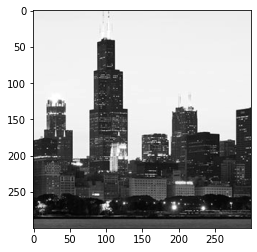

In [31]:
image = cv2.imread("../images/cityscapes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

n = image.shape[0]
m = image.shape[1]

## Show Histogram

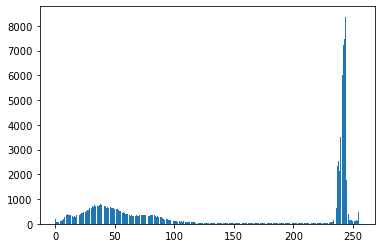

In [32]:
# create histogram
imgVals = createHistogram(image)
plt.bar(range(len(imgVals)), imgVals)
plt.show()

<span style="color:pink; font-size:3.5rem">*2. Equalize Histogram*</span>.

###  $s(k) = \frac{L-1}{MN} \sum_{j=0}^{k} n_j$

In [33]:
def equalizeImg(img, histValues):
    newImg = np.zeros((n,m))
    res = 0
    k = (len(histValues)-1)/(m*n) #(L-1)/M*N
    for w in range(n):
        for h in range(m):
            for s in range(img[w,h]):
                res += histValues[s]
            newImg[w,h]= k*res
            res = 0
    return newImg

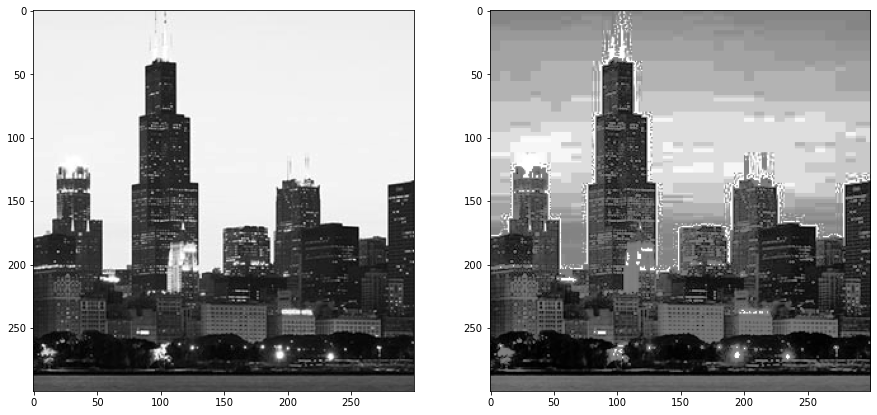

In [34]:
newImage = equalizeImg(image, imgVals)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(newImage, cmap="gray")
plt.show()